In [1]:
# Install the pyspark library
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Import necessary modules from pyspark.sql
import pyspark.sql
from pyspark.sql import SparkSession

In [3]:
# Create a SparkSession with the name "firstApp"
spark = SparkSession.builder.appName("firstApp").getOrCreate()

In [4]:
# Print the SparkSession object, which displays its configuration
spark

In [5]:
#get financial data as csv
# Import the files module from google.colab
from google.colab import files
files.upload()

Saving NVDA.csv to NVDA (1).csv


{'NVDA.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2018-06-13,65.660004,66.417503,65.507500,65.599998,65.000916,33820800\n2018-06-14,66.055000,67.300003,65.904999,66.727501,66.118118,43001600\n2018-06-15,66.150002,66.870003,65.837502,66.315002,65.709389,43226000\n2018-06-18,65.870003,66.449997,65.595001,66.272499,65.667259,35626800\n2018-06-19,65.230003,65.910004,63.755001,65.042503,64.448502,59493200\n2018-06-20,65.457497,66.112503,65.070000,65.577499,64.978600,36978000\n2018-06-21,65.900002,66.084999,64.199997,64.277496,63.690483,35951600\n2018-06-22,64.487503,64.622498,62.582500,62.737499,62.164551,43416000\n2018-06-25,61.662498,61.700001,58.884998,59.779999,59.234051,66581600\n2018-06-26,60.924999,61.412498,59.977501,60.497501,59.945007,47888400\n2018-06-27,60.937500,61.607498,58.875000,58.930000,58.391819,45389200\n2018-06-28,58.830002,60.334999,58.752499,60.215000,59.665089,33801200\n2018-06-29,60.872501,61.000000,59.212502,59.224998,58.684124,39230000\n2018-07-02,58.52249

In [6]:
# Read the "NVDA.csv" file into a DataFrame named "df" with headers and inferred schema
df = spark.read.csv("NVDA.csv", header=True, inferSchema=True)

In [7]:
# Display the DataFrame
df

DataFrame[Date: date, Open: double, High: double, Low: double, Close: double, Adj Close: double, Volume: int]

In [8]:
# Print the column names of the DataFrame
df.columns

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

In [9]:
# Print the schema of the DataFrame
df.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: double (nullable = true)
 |-- High: double (nullable = true)
 |-- Low: double (nullable = true)
 |-- Close: double (nullable = true)
 |-- Adj Close: double (nullable = true)
 |-- Volume: integer (nullable = true)



In [10]:
# Print the first 10 rows of the DataFrame
for row in df.head(10):
  print(row)

Row(Date=datetime.date(2018, 6, 13), Open=65.660004, High=66.417503, Low=65.5075, Close=65.599998, Adj Close=65.000916, Volume=33820800)
Row(Date=datetime.date(2018, 6, 14), Open=66.055, High=67.300003, Low=65.904999, Close=66.727501, Adj Close=66.118118, Volume=43001600)
Row(Date=datetime.date(2018, 6, 15), Open=66.150002, High=66.870003, Low=65.837502, Close=66.315002, Adj Close=65.709389, Volume=43226000)
Row(Date=datetime.date(2018, 6, 18), Open=65.870003, High=66.449997, Low=65.595001, Close=66.272499, Adj Close=65.667259, Volume=35626800)
Row(Date=datetime.date(2018, 6, 19), Open=65.230003, High=65.910004, Low=63.755001, Close=65.042503, Adj Close=64.448502, Volume=59493200)
Row(Date=datetime.date(2018, 6, 20), Open=65.457497, High=66.112503, Low=65.07, Close=65.577499, Adj Close=64.9786, Volume=36978000)
Row(Date=datetime.date(2018, 6, 21), Open=65.900002, High=66.084999, Low=64.199997, Close=64.277496, Adj Close=63.690483, Volume=35951600)
Row(Date=datetime.date(2018, 6, 22), O

In [11]:
# Compute summary statistics of the DataFrame using the describe() method and display them
df.describe().show()

+-------+------------------+------------------+-----------------+-----------------+------------------+-------------------+
|summary|              Open|              High|              Low|            Close|         Adj Close|             Volume|
+-------+------------------+------------------+-----------------+-----------------+------------------+-------------------+
|  count|              1258|              1258|             1258|             1258|              1258|               1258|
|   mean|133.67143265182818|136.30456668044525|130.9992169507157|133.7661744594594|133.51359925755165|4.676630047694754E7|
| stddev| 82.50775355738129| 84.26982678975844|80.65176768301191|82.50197149908298| 82.53938872567821| 2.14951777977007E7|
|    min|         31.622499|         32.494999|           31.115|            31.77|         31.528599|            9788400|
|    max|        405.950012|        419.380005|        399.48999|       401.109985|        401.068481|          251152800|
+-------+-------

In [12]:
# Print the schema of the summary DataFrame
description = df.describe()

In [13]:
# Import the format_number function from pyspark.sql.functions
from pyspark.sql.functions import format_number

# Compute formatted summary statistics, selecting specific columns, and display them
description.select(description["summary"],
                   format_number(description["Open"].cast("float"), 2).alias("Open"),
                   format_number(description["High"].cast("float"), 2).alias("High"),
                   format_number(description["Low"].cast("float"), 2).alias("Low"),
                   format_number(description["Close"].cast("float"), 2).alias("Close"),
                   description["Volume"].cast("int").alias("Volume")
                   ).show()

+-------+--------+--------+--------+--------+---------+
|summary|    Open|    High|     Low|   Close|   Volume|
+-------+--------+--------+--------+--------+---------+
|  count|1,258.00|1,258.00|1,258.00|1,258.00|     1258|
|   mean|  133.67|  136.30|  131.00|  133.77|     null|
| stddev|   82.51|   84.27|   80.65|   82.50|     null|
|    min|   31.62|   32.49|   31.11|   31.77|  9788400|
|    max|  405.95|  419.38|  399.49|  401.11|251152800|
+-------+--------+--------+--------+--------+---------+



In [14]:
# Create a new DataFrame "new_df" with an additional column "Open:Volume Ratio" computed from existing columns
new_df = df.withColumn("Open:Volume Ratio", df["Open"]/df["Volume"])

In [15]:
df.show()

+----------+---------+---------+---------+---------+---------+--------+
|      Date|     Open|     High|      Low|    Close|Adj Close|  Volume|
+----------+---------+---------+---------+---------+---------+--------+
|2018-06-13|65.660004|66.417503|  65.5075|65.599998|65.000916|33820800|
|2018-06-14|   66.055|67.300003|65.904999|66.727501|66.118118|43001600|
|2018-06-15|66.150002|66.870003|65.837502|66.315002|65.709389|43226000|
|2018-06-18|65.870003|66.449997|65.595001|66.272499|65.667259|35626800|
|2018-06-19|65.230003|65.910004|63.755001|65.042503|64.448502|59493200|
|2018-06-20|65.457497|66.112503|    65.07|65.577499|  64.9786|36978000|
|2018-06-21|65.900002|66.084999|64.199997|64.277496|63.690483|35951600|
|2018-06-22|64.487503|64.622498|  62.5825|62.737499|62.164551|43416000|
|2018-06-25|61.662498|61.700001|58.884998|59.779999|59.234051|66581600|
|2018-06-26|60.924999|61.412498|59.977501|60.497501|59.945007|47888400|
|2018-06-27|  60.9375|61.607498|   58.875|    58.93|58.391819|45

In [16]:
# Select and display only the "Open:Volume Ratio" column from "new_df"
new_df.select("Open:Volume Ratio").show()

+--------------------+
|   Open:Volume Ratio|
+--------------------+
|1.941408955435708...|
|1.536105633278762E-6|
|1.530329014944709...|
|1.848889122795199...|
|1.096427877471711E-6|
|1.770174076477906E-6|
|1.833020004672949...|
|1.485339575271789...|
|9.261191980967715E-7|
|1.272228744330568...|
|1.342555057150159E-6|
|1.740470811687159E-6|
|1.551682411419831...|
|1.636663357309856...|
|2.734676651760860...|
|1.951808592627426...|
|2.039297895745599...|
|2.059447808345399...|
|1.734297920092440...|
|1.697241964800766...|
+--------------------+
only showing top 20 rows



In [17]:
# Retrieve the highest value in the "High" column of the DataFrame
#Find which day had the highest price
df.orderBy(df["High"]).head(1)[0][0]

datetime.date(2018, 12, 24)

In [18]:
# Import the mean function from pyspark.sql.functions
from pyspark.sql.functions import mean

#Find the average stock open price
df.select(mean("Open")).show()

+------------------+
|         avg(Open)|
+------------------+
|133.67143265182818|
+------------------+



In [19]:
# Import the max and min functions from pyspark.sql.functions
#Looking at the maximum and minimum prices of stocks
from pyspark.sql.functions import max, min

# Compute the maximum and minimum values of the "Close" column
df.select(max("Close"), min("Close")).show()

+----------+----------+
|max(Close)|min(Close)|
+----------+----------+
|401.109985|     31.77|
+----------+----------+



In [20]:
import plotly.graph_objects as go

dates = df.select('Date').rdd.flatMap(lambda x: x).collect()
opens = df.select('Open').rdd.flatMap(lambda x: x).collect()
highs = df.select('High').rdd.flatMap(lambda x: x).collect()
lows = df.select('Low').rdd.flatMap(lambda x: x).collect()
closes = df.select('Close').rdd.flatMap(lambda x: x).collect()

fig = go.Figure(data=[go.Candlestick(x=dates,
                                    open=opens,
                                    high=highs,
                                    low=lows,
                                    close=closes)])

fig.update_layout(title='Stock Price Movement for NVDA Last 5 years',
                  xaxis_title='Date',
                  yaxis_title='Stock Price')

fig.show()


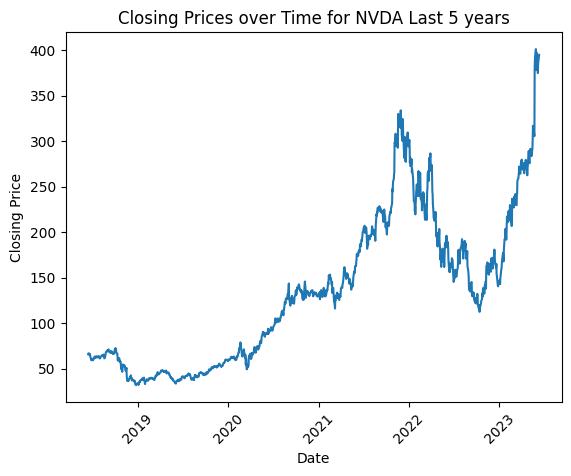

In [21]:
import matplotlib.pyplot as plt

dates = df.select('Date').toPandas()['Date']
closing_prices = df.select('Close').toPandas()['Close']

plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices over Time for NVDA Last 5 years')
plt.xticks(rotation=45)
plt.show()


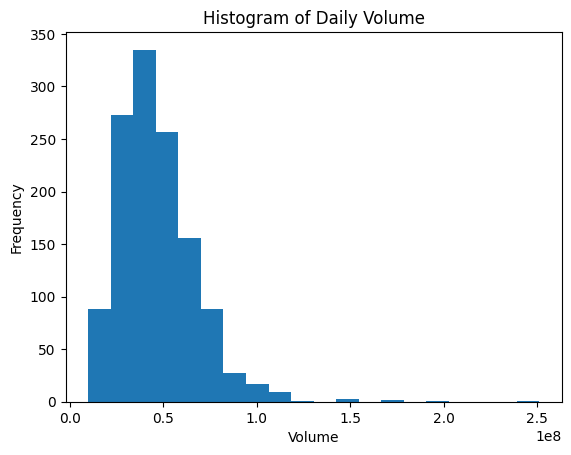

In [22]:
import matplotlib.pyplot as plt

volume = df.select('Volume').toPandas()['Volume']

plt.hist(volume, bins=20)
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Daily Volume')
plt.show()


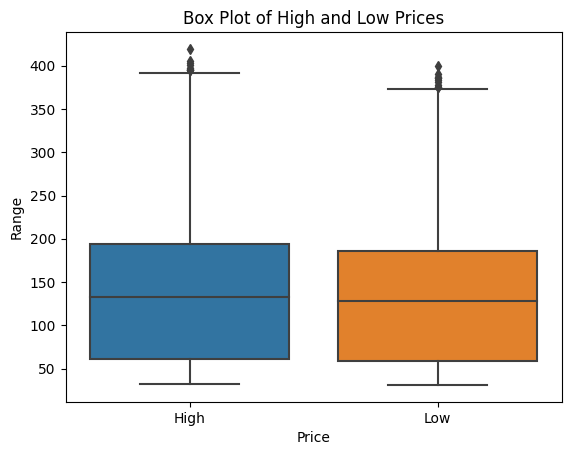

In [23]:
import pandas as pd
import seaborn as sns

high_prices = df.select('High').toPandas()['High']
low_prices = df.select('Low').toPandas()['Low']

data = pd.DataFrame({'High': high_prices, 'Low': low_prices})
sns.boxplot(data=data)
plt.xlabel('Price')
plt.ylabel('Range')
plt.title('Box Plot of High and Low Prices')
plt.show()


In [24]:
#Filtering for how many stocks have a volume less than 2M
df.filter("Volume > 2000000").count()

1258

In [25]:
# Calculate the percentage of rows where "Open" is greater than 100 in the DataFrame
(df.filter(df["Open"] > 100).count() * 1.0 / df.count()) * 100

58.50556438791733

In [26]:
df.select("Open").distinct().show()

+----------+
|      Open|
+----------+
| 34.037498|
|   45.7775|
|      74.5|
|    151.25|
|181.860001|
| 33.514999|
|      47.5|
| 53.599998|
| 63.912498|
|104.142502|
|120.722504|
|132.360001|
|199.899994|
|223.050003|
|270.309998|
| 62.837502|
|   62.9025|
| 35.450001|
| 69.667503|
|152.315002|
+----------+
only showing top 20 rows



In [27]:
# Import the corr function from pyspark.sql.functions
from pyspark.sql.functions import corr

In [28]:
# Calculate the correlation between the "Open" and "Volume" columns of the DataFrame
df.select(corr("Open", "Volume")).show()

+--------------------+
|  corr(Open, Volume)|
+--------------------+
|-0.03688414070821...|
+--------------------+



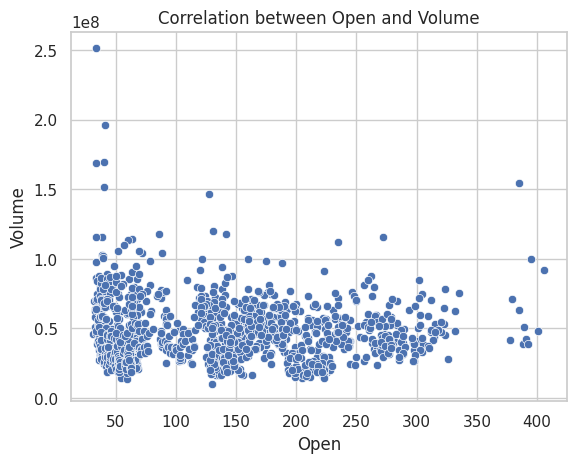

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
sns.scatterplot(data=df.toPandas(), x='Open', y='Volume')
plt.title('Correlation between Open and Volume')
plt.xlabel('Open')
plt.ylabel('Volume')
plt.show()


In [30]:
# Import the year function from pyspark.sql.functions
from pyspark.sql.functions import year

# Create a new DataFrame "df_with_year" with an additional column "Year" extracted from the "Date" column
df_with_year = df.withColumn("Year", year(df["Date"]))

In [31]:
# Display the DataFrame with the "Year" column
df_with_year.show()

+----------+---------+---------+---------+---------+---------+--------+----+
|      Date|     Open|     High|      Low|    Close|Adj Close|  Volume|Year|
+----------+---------+---------+---------+---------+---------+--------+----+
|2018-06-13|65.660004|66.417503|  65.5075|65.599998|65.000916|33820800|2018|
|2018-06-14|   66.055|67.300003|65.904999|66.727501|66.118118|43001600|2018|
|2018-06-15|66.150002|66.870003|65.837502|66.315002|65.709389|43226000|2018|
|2018-06-18|65.870003|66.449997|65.595001|66.272499|65.667259|35626800|2018|
|2018-06-19|65.230003|65.910004|63.755001|65.042503|64.448502|59493200|2018|
|2018-06-20|65.457497|66.112503|    65.07|65.577499|  64.9786|36978000|2018|
|2018-06-21|65.900002|66.084999|64.199997|64.277496|63.690483|35951600|2018|
|2018-06-22|64.487503|64.622498|  62.5825|62.737499|62.164551|43416000|2018|
|2018-06-25|61.662498|61.700001|58.884998|59.779999|59.234051|66581600|2018|
|2018-06-26|60.924999|61.412498|59.977501|60.497501|59.945007|47888400|2018|

In [32]:
# Display the DataFrame with the "Year" column
df_with_year.show()

+----------+---------+---------+---------+---------+---------+--------+----+
|      Date|     Open|     High|      Low|    Close|Adj Close|  Volume|Year|
+----------+---------+---------+---------+---------+---------+--------+----+
|2018-06-13|65.660004|66.417503|  65.5075|65.599998|65.000916|33820800|2018|
|2018-06-14|   66.055|67.300003|65.904999|66.727501|66.118118|43001600|2018|
|2018-06-15|66.150002|66.870003|65.837502|66.315002|65.709389|43226000|2018|
|2018-06-18|65.870003|66.449997|65.595001|66.272499|65.667259|35626800|2018|
|2018-06-19|65.230003|65.910004|63.755001|65.042503|64.448502|59493200|2018|
|2018-06-20|65.457497|66.112503|    65.07|65.577499|  64.9786|36978000|2018|
|2018-06-21|65.900002|66.084999|64.199997|64.277496|63.690483|35951600|2018|
|2018-06-22|64.487503|64.622498|  62.5825|62.737499|62.164551|43416000|2018|
|2018-06-25|61.662498|61.700001|58.884998|59.779999|59.234051|66581600|2018|
|2018-06-26|60.924999|61.412498|59.977501|60.497501|59.945007|47888400|2018|

In [33]:
# Group the DataFrame by "Year" and calculate the maximum value of the "High" column for each group
max_year_df = df_with_year.groupBy("Year").max()


In [34]:
# Select and display the "Year" and "max(High)" columns from "max_year_df"
max_year_df.select("Year", "max(High)").show()

+----+----------+
|Year| max(High)|
+----+----------+
|2018| 73.190002|
|2023|419.380005|
|2022|307.109985|
|2019| 60.452499|
|2020|147.267502|
|2021|346.470001|
+----+----------+



In [35]:
# Import the month function from pyspark.sql.functions
from pyspark.sql.functions import month

# Create a new DataFrame "df_with_month" with an additional column "Month" extracted from the "Date" column
df_with_month = df.withColumn("Month", month("Date"))

In [36]:
# Display the DataFrame with the "Month" column
df_with_month.show()

+----------+---------+---------+---------+---------+---------+--------+-----+
|      Date|     Open|     High|      Low|    Close|Adj Close|  Volume|Month|
+----------+---------+---------+---------+---------+---------+--------+-----+
|2018-06-13|65.660004|66.417503|  65.5075|65.599998|65.000916|33820800|    6|
|2018-06-14|   66.055|67.300003|65.904999|66.727501|66.118118|43001600|    6|
|2018-06-15|66.150002|66.870003|65.837502|66.315002|65.709389|43226000|    6|
|2018-06-18|65.870003|66.449997|65.595001|66.272499|65.667259|35626800|    6|
|2018-06-19|65.230003|65.910004|63.755001|65.042503|64.448502|59493200|    6|
|2018-06-20|65.457497|66.112503|    65.07|65.577499|  64.9786|36978000|    6|
|2018-06-21|65.900002|66.084999|64.199997|64.277496|63.690483|35951600|    6|
|2018-06-22|64.487503|64.622498|  62.5825|62.737499|62.164551|43416000|    6|
|2018-06-25|61.662498|61.700001|58.884998|59.779999|59.234051|66581600|    6|
|2018-06-26|60.924999|61.412498|59.977501|60.497501|59.945007|47

In [37]:
# Group the DataFrame by "Month" and calculate the mean of the "High" column for each group
df_with_month.select("Month", "High").groupBy("Month").mean().show()

+-----+----------+------------------+
|Month|avg(Month)|         avg(High)|
+-----+----------+------------------+
|   12|      12.0| 143.5379044571429|
|    1|       1.0|133.42215283168318|
|    6|       6.0|136.88917466981127|
|    3|       3.0|151.78522318749998|
|    5|       5.0|155.54099971428568|
|    9|       9.0|122.02215775490193|
|    4|       4.0|151.49497429411764|
|    8|       8.0|123.77704890990988|
|    7|       7.0|113.52422217924524|
|   10|      10.0|117.70556819090912|
|   11|      11.0|141.62592212621365|
|    2|       2.0|146.05657967368418|
+-----+----------+------------------+



In [38]:
# Calculate the average of the "High" column for each month and display the results, ordered by month
average_months = df_with_month.select("Month", "High").groupBy("Month").mean()

average_months.select("Month", "avg(High)").orderBy("Month").show()

+-----+------------------+
|Month|         avg(High)|
+-----+------------------+
|    1|133.42215283168318|
|    2|146.05657967368418|
|    3|151.78522318749998|
|    4|151.49497429411764|
|    5|155.54099971428568|
|    6|136.88917466981127|
|    7|113.52422217924524|
|    8|123.77704890990988|
|    9|122.02215775490193|
|   10|117.70556819090912|
|   11|141.62592212621365|
|   12| 143.5379044571429|
+-----+------------------+



In [39]:
df

DataFrame[Date: date, Open: double, High: double, Low: double, Close: double, Adj Close: double, Volume: int]

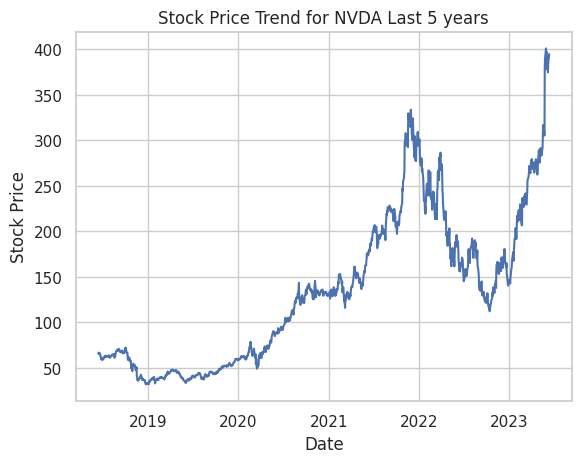

In [40]:
import matplotlib.pyplot as plt

dates = df.select('Date').collect()
prices = df.select('Close').collect()

plt.plot(dates, prices)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Trend for NVDA Last 5 years')
plt.show()


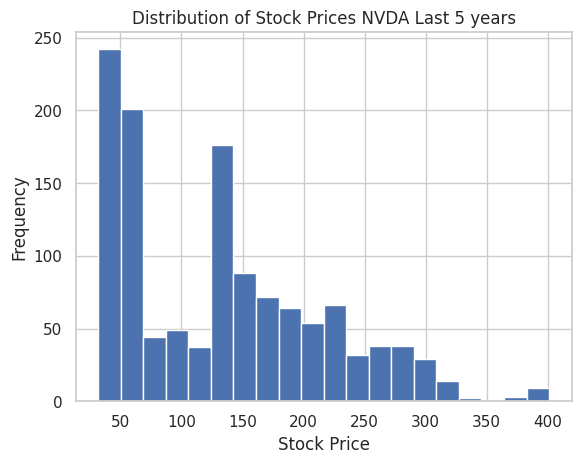

In [42]:
import matplotlib.pyplot as plt

prices = df.select('Close').rdd.flatMap(lambda x: x).collect()

plt.hist(prices, bins=20)
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.title('Distribution of Stock Prices NVDA Last 5 years')
plt.show()


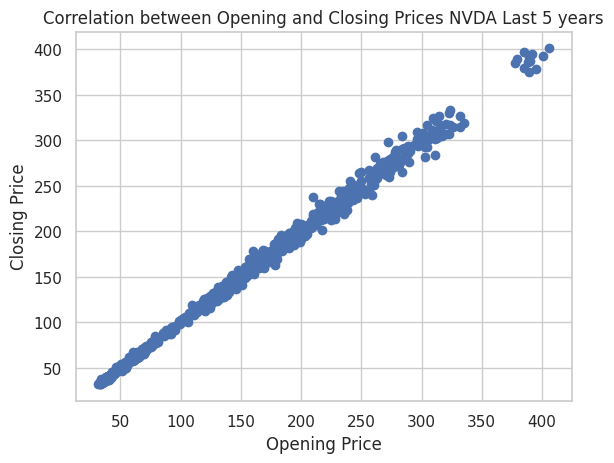

In [43]:
import matplotlib.pyplot as plt

opens = df.select('Open').rdd.flatMap(lambda x: x).collect()
closes = df.select('Close').rdd.flatMap(lambda x: x).collect()

plt.scatter(opens, closes)
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Correlation between Opening and Closing Prices NVDA Last 5 years')
plt.show()


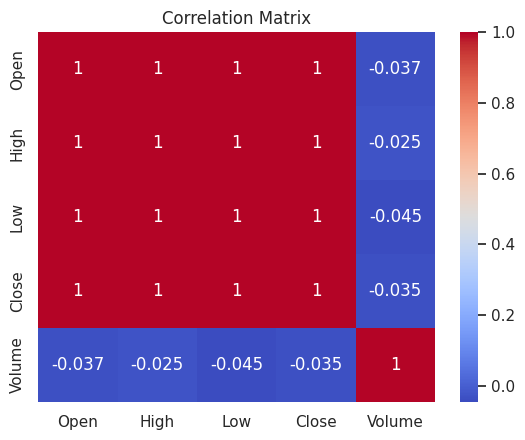

In [51]:
import seaborn as sns

corr_matrix = df.select('Open', 'High', 'Low', 'Close', 'Volume').toPandas().corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


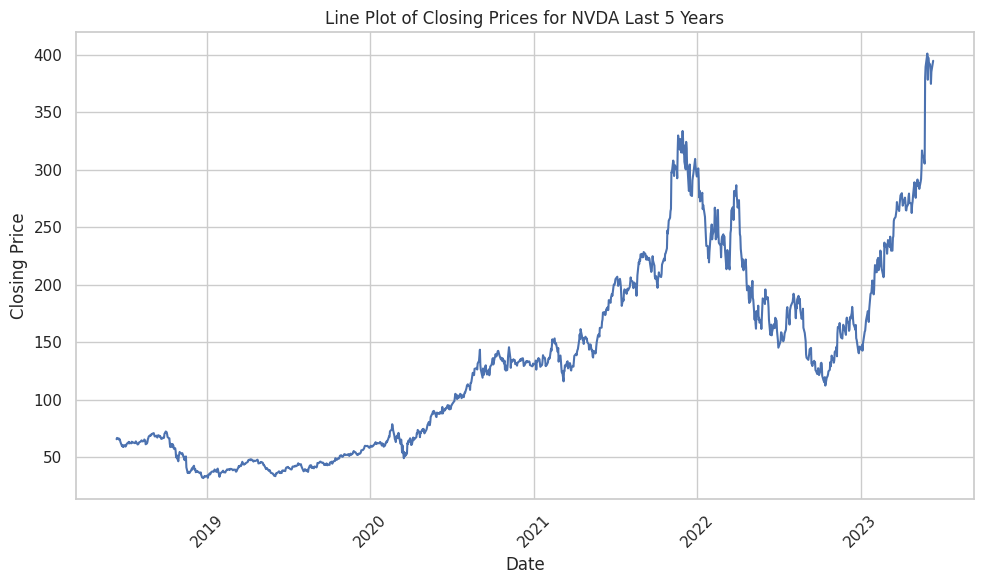

In [44]:
import matplotlib.pyplot as plt

dates = df.select('Date').toPandas()['Date']
closing_prices = df.select('Close').toPandas()['Close']

plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Line Plot of Closing Prices for NVDA Last 5 Years')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
